In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
import hdbscan
import pandas as pd
%matplotlib inline


sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

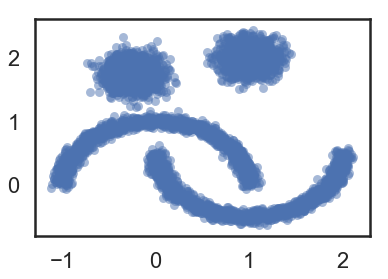

In [2]:
moons, _ = data.make_moons(n_samples=3000, noise=0.05)
blobs, _ = data.make_blobs(n_samples=3000, centers=[(-0.25,1.75), (1.0, 2.0)], cluster_std=0.15)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [3]:
def funk(df, method, list_name):
    import warnings
    warnings.filterwarnings('ignore')  
    global data_leaf, data_eom
    n = df.shape[0]
    for gamma in range (1, int(np.log(n))):
        for ms in range(1, int(2 * np.log(n))):
            clust_alg = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                                    approx_min_span_tree=True,
                                    gen_min_span_tree=True, 
                                    leaf_size=40,
                                    cluster_selection_method=method,
                                    metric='euclidean', 
                                    min_cluster_size=int(gamma * np.sqrt(n)), 
                                    min_samples=ms,
                                    allow_single_cluster=False).fit(df)
 
            min_cluster_size = clust_alg.min_cluster_size 
            min_samples = clust_alg.min_samples
            validity_score = clust_alg.relative_validity_
            n_clusters = np.max(clust_alg.labels_) 
            list_name.append((min_cluster_size, min_samples, validity_score, n_clusters))
            if validity_score >= .5:
                print (f'min_cluster_size = {min_cluster_size},  min_samples = {min_samples}, validity_score = {validity_score} n_clusters = {n_clusters}')

def best_validity(source):
    cols = ['min_cluster_size', 'min_samples', 'validity_score', 'n_clusters']
    df =  pd.DataFrame(source, columns = cols)
    best_validity = df.loc[df['validity_score'].idxmax()]
    return best_validity


data_leaf = []
data_eom = []


In [4]:
funk(df = test_data, method = 'leaf', list_name = data_leaf)
best_leaf = best_validity(data_leaf)
best_leaf

min_cluster_size = 232,  min_samples = 13, validity_score = 0.5132561577168371 n_clusters = 5
min_cluster_size = 309,  min_samples = 7, validity_score = 0.5050133591684871 n_clusters = 4
min_cluster_size = 387,  min_samples = 5, validity_score = 0.5246790819316269 n_clusters = 4
min_cluster_size = 387,  min_samples = 6, validity_score = 0.514288313839275 n_clusters = 4
min_cluster_size = 387,  min_samples = 7, validity_score = 0.5050133591684871 n_clusters = 4


min_cluster_size    387.000000
min_samples           5.000000
validity_score        0.524679
n_clusters            4.000000
Name: 68, dtype: float64

In [5]:
funk(df = test_data, method = 'eom', list_name = data_eom)
best_eom = best_validity(data_eom)
best_eom

min_cluster_size    77.000000
min_samples          1.000000
validity_score       0.486341
n_clusters           3.000000
Name: 0, dtype: float64

In [6]:
clust_alg_eom = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                            approx_min_span_tree=True,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            cluster_selection_method='eom',
                            metric='euclidean', 
                            min_cluster_size=int(best_eom['min_cluster_size']), 
                            min_samples=int(best_eom['min_samples']), 
                            allow_single_cluster=False).fit(test_data)

In [7]:
np.unique(clust_alg_eom.labels_, return_counts = True)

(array([0, 1, 2, 3]), array([1500, 1500, 1500, 1500]))

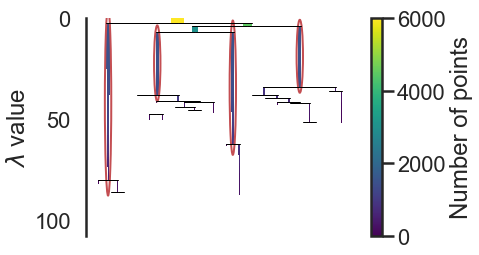

In [8]:
clust_alg_eom.condensed_tree_.plot(select_clusters=True)

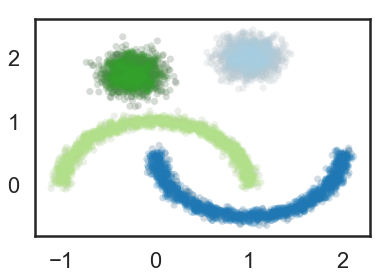

In [10]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clust_alg_eom.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clust_alg_eom.probabilities_)]
plt.scatter(*test_data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [11]:
clust_alg_leaf = hdbscan.HDBSCAN(algorithm='best', alpha=1.0,
                            approx_min_span_tree=True,
                            gen_min_span_tree=True, 
                            leaf_size=40,
                            cluster_selection_method='leaf',
                            metric='euclidean', 
                            min_cluster_size=int(best_leaf['min_cluster_size']), 
                            min_samples=int(best_leaf['min_samples']), 
                            allow_single_cluster=False).fit(test_data)

In [12]:
np.unique(clust_alg_leaf.labels_, return_counts = True)

(array([-1,  0,  1,  2,  3,  4]), array([ 312, 1500, 1500, 1496,  730,  462]))

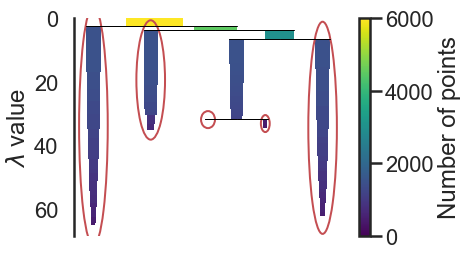

In [13]:
clust_alg_leaf.condensed_tree_.plot(select_clusters=True)

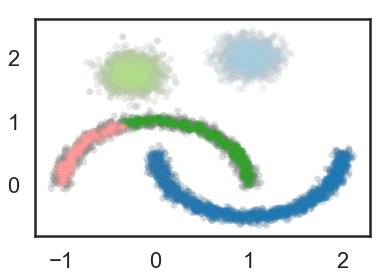

In [14]:
color_palette = sns.color_palette('Paired', 30)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clust_alg_leaf.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clust_alg_leaf.probabilities_)]
plt.scatter(*test_data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)